In [37]:
#do this once for those packages not already installed

#pip install tabula
#pip install numpy
#pip install string
#pip install os
#follow camelot install guide at https://camelot-py.readthedocs.io/en/master/user/install.html#install


SyntaxError: invalid syntax (2170143384.py, line 9)

In [1]:
import camelot
import pandas as pd
import numpy as np
import string
#only need to import os if using monkey patch to to_csv method below
import os

In [31]:
# copy in input and output locations, output csv must be on local machine currently due to permission errors,
# make sure the r remains before address

input_pdf = r"C:\Users\winte\Downloads\zedcor_2023_10q1.pdf"

csv = r"C:\Users\winte\Downloads\zedcor_2023_10q1_windows_3.csv"

# #this needs some working as getting permission errors writing directly into Tiger Hill folders
# output_csv = input_pdf.replace(".pdf", ".csv")
# print(output_csv)

In [ ]:
# ### monkey patch to change to_csv method to encode UTF-8- failing

# # define corrected method
# def to_csv(self, path, **kwargs):
#     """Writes Table to a csv file.
#     For kwargs, check :meth:`pandas.DataFrame.to_csv`.
#     Parameters
#     ----------
#     path : str
#         Output filepath.
#     """
#     csv_string = self.df.to_csv(**kwargs)
#     with open(path, "w", encoding="utf-8") as f:
#         f.write(csv_string)

# # replace original method with monkey patch function
# camelot.core.Table.to_csv=to_csv

# def CustomScript(args):
#     path_to_pdf = r"C:\Users\winte\Downloads\2023 10q3.pdf"
#     folder_to_pdf = os.path.dirname(path_to_pdf)
#     tables = camelot.read_pdf(os.path.normpath(path_to_pdf), flavor='stream', pages='1-end')
#     tables.export(os.path.normpath(os.path.join(folder_to_pdf,"temp","foo.csv")), f='csv')
#     return CustomScriptReturn.Empty()

In [ ]:
# will result in 'IndexError: sequence index out of range' unless max_page_no is changed to correct value, but runs fine...
# ... and exports to csv regardless will only error out after all pages uploaded 
max_page_no = 200

for i in range(1,max_page_no):
    page = str(i)
#     # below line is attempt to encode input_pdf as UTF-8- failing
    tables = camelot.read_pdf(input_pdf, flavor='stream', pages=page, table_areas=['0,780,566,0'])
#     tables = camelot.read_pdf(path_to_pdf, flavor='stream', pages=page)
    
#     # below line is attempt to encode input_pdf as UTF-8- failing
#     tables = camelot.read_pdf(input_pdf, flavor='stream', pages=page, encoding='utf-8')

    no_tables = tables.n
    
    # print below optional just shows camelot is doing what it is supposed to
    print('Page number:', i, ' Number of tables:', no_tables)
    
    for j in range(1, no_tables + 1):
        df = tables[j-1].df
        
#         # below if/else removes a large amount of excess text not in tables from pdf, can be hashed/unhashed and easily changed as required
#         char_max = 30
#         if len(df.columns) > 2:
#             df = df[~(df[0].astype(str).str.len().gt(char_max) | df[1].astype(str).str.len().gt(char_max)| df[2].astype(str).str.len().gt(char_max))]
#         if len(df.columns) > 1:
#             df = df[~(df[0].astype(str).str.len().gt(char_max) | df[1].astype(str).str.len().gt(char_max))]
#         else:
#             df = df[~df[0].astype(str).str.len().gt(char_max)]

        # Create an empty row DataFrame with the same columns as df
        empty_row = pd.DataFrame([[''] * len(df.columns)], columns=df.columns)
        # Concatenate df and empty_rows (as many as desired have put 3 as standard)
        df = pd.concat([df, empty_row, empty_row, empty_row], ignore_index=True)
        
#         df.replace(to_replace = r'â€”', value=0, inplace = False)- failing due to UTF-8 encoding
        df.to_csv(csv, mode='a', index=False, header=False)

### results may include error message shown below, this is caused by large blocks of text with words at a distance apart that
### camelot is not sure how to treat them, as long as it keeps running after (it should), this is completely fine
    # C:\Users\winte\anaconda3\lib\site-packages\camelot\parsers\stream.py:365: UserWarning: No tables found in table area 1
    # warnings.warn(f"No tables found in table area {table_idx + 1}")

C:\Users\winte\AppData\Local\Temp\ipykernel_23340\2455493688.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


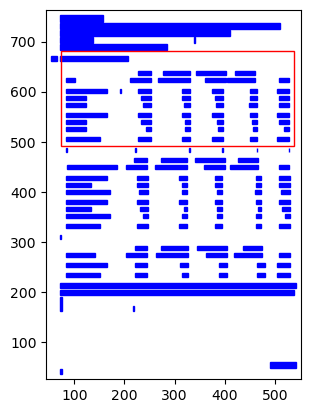

In [6]:
tables = camelot.read_pdf(input_pdf, flavor='stream', pages = '7')
camelot.plot(tables[0], kind='contour').show()

Page number: 7  Number of tables: 1


C:\Users\winte\AppData\Local\Temp\ipykernel_23340\1279635425.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[j-1], kind='contour').show()


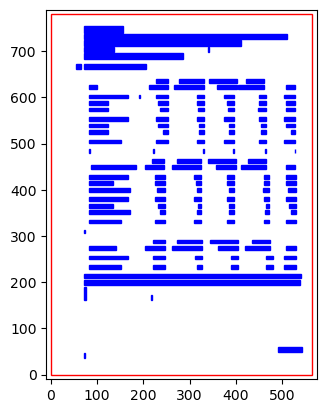

In [27]:
# will result in 'IndexError: sequence index out of range' unless max_page_no is changed to correct value, but runs fine...
# ... and exports to csv regardless will only error out after all pages uploaded 
max_page_no = 200

for i in range(7,8):
    page = str(i)

    tables = camelot.read_pdf(input_pdf, flavor='stream', pages=page, table_areas=['0,780,566,0'])

    no_tables = tables.n
    
    # print below optional just shows camelot is doing what it is supposed to
    print('Page number:', i, ' Number of tables:', no_tables)
    
    for j in range(1, no_tables + 1):
        df = tables[j-1].df
        camelot.plot(tables[j-1], kind='contour').show()
